# Pre-Processing and EDA

side note: working on the folder data_w_styles
### Things to do:
- make the framework simpler by working with images that have no more than a few person objects - good for clarity
- refine the number of styles i am working with

In [21]:
import os
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from ultralytics import YOLO
import matplotlib.pyplot as plt



In [11]:
base_path = '/Users/macbookpro/Desktop/thesis_project/PeopleArt'
images_path = os.path.join(base_path,'JPEGImages')
annotaions_path = os.path.join(base_path,'txt_annotations')

In [7]:
genres = os.listdir(images_path)
genres = [folder for folder in genres if folder != ".DS_Store"]
genres.sort()
print("Folders of genres:", genres)

Folders of genres: ['Academicism', 'AnalyticalRealism', 'ArtDeco', 'ArtNouveau(Modern)', 'Biedermeier', 'Classicism', 'Constructivism', 'Cubism', 'Cubo-Futurism', 'Divisionism', 'EnvironmentalArt', 'FantasticRealism', 'FeministArt', 'HighRenaissance', 'Impressionism', 'InternationalGothic', 'Japonism', 'LowbrowArt', 'MagicRealism', 'MechanisticCubism', 'Muralism', 'Naturalism', 'Neo-FigurativeArt', 'Neo-Rococo', 'Neo-baroque', 'NewEuropeanPainting', 'NorthernRenaissance', 'Outsiderart', 'Photorealism', 'PopArt', 'PosterArtRealism', 'ProtoRenaissance', 'Realism', 'Rococo', 'Shin-hanga', 'SocialistRealism', 'Suprematism', 'Symbolism', 'Synthetism', 'Tonalism', 'Ukiyo-e', 'cartoon', 'photo']


In [18]:
images = []
annotations = []

for genre in genres:
    folder_path = os.path.join(images_path, genre)
    for image in os.listdir(folder_path):
        if image.lower().endswith(('.png', '.jpg', '.jpeg')):  
            image_path = os.path.join(folder_path, image)
            images.append((image_path))
for genre in genres:
    folder_path = os.path.join(annotaions_path, genre)
    for file in os.listdir(folder_path):
        if file.lower().endswith(('.txt')):  
            file_path = os.path.join(folder_path, file)
            annotations.append((file_path))

In [19]:
len(annotations)

1644

In [20]:
len(images)

4778

Only 1644 images in the dataset have annotations out of original 4778.

In [22]:
genre_counts = {}
for genre in genres:
    genre_path = os.path.join(annotaions_path,genre)
    if os.path.isdir(genre_path):
        num_annotations = len([file for file in os.listdir(genre_path) if file.endswith(('.txt'))])
        genre_counts[genre] = num_annotations

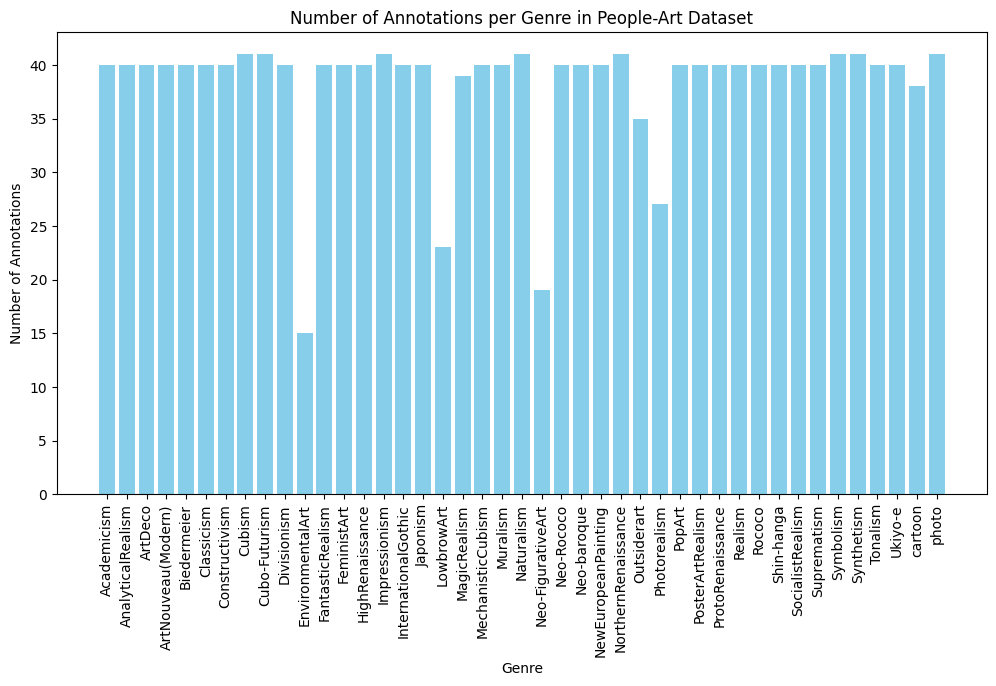

In [26]:
#i want to plot number of annotations per genre
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Annotations')
plt.title('Number of Annotations per Genre in People-Art Dataset')
plt.show()

seems like generally there are around 40 images per genre